# Игры-бестселлеры на PS4. Описание проекта.

Ссылка на Kaggle: https://www.kaggle.com/datasets/drahulsingh/list-of-best-selling-ps4-games

Оригинальное описание.

Discover the engaging titles that enthralled players around the world with their immersive gameplay, gorgeous visuals, and compelling storytelling by exploring the list of the best-selling PlayStation 4 video games. Learn about the iconic games that defined the PS4 era and forever changed the gaming landscape.

# Загрузка данных.

Загружаем необходимые для работы библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Загружаем данные.

In [ ]:
df = pd.read_csv('/Datasets/List of best-selling PlayStation 4 video games.csv', sep = ',')

Смотрим информацию о данных.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             33 non-null     object
 1   Copies sold      33 non-null     object
 2   Release date[a]  33 non-null     object
 3   Genre(s)         33 non-null     object
 4   Developer(s)     33 non-null     object
 5   Publisher(s)     33 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


In [ ]:
df.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20 million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5 million,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16 million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8 million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10 million,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


Видим, что датасет у нас маленький, наверняка вся информация в нём заполнена правильно, но проверка всё равно не помешает. Названия столбцов неудобные, количество копий и дата релиза записаны в неправильных для наших целей форматах данных, исправим.

Проверям датасет на пропуски.

In [ ]:
pd.DataFrame(
    round(
        df.isna().mean() * 100,
    )
).style.background_gradient('coolwarm')

,0
Game,0.000000
Copies sold,0.000000
Release date[a],0.000000
Genre(s),0.000000
Developer(s),0.000000
Publisher(s),0.000000


Проверяем датасет на явные и неявные дубликаты.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['Game', 'Developer(s)'], keep=False).sum()

0

Переименовываем столбцы в более удобный для нас вид.

In [ ]:
df.rename(columns={'Release date[a]': 'Release date'}, inplace=True)
df.rename(columns={'Genre(s)': 'Genre'}, inplace=True)
df.rename(columns={'Developer(s)': 'Developer'}, inplace=True)
df.rename(columns={'Publisher(s)': 'Publisher'}, inplace=True)

Создаём и применяем функции для замены типов данных на требуемый.

In [ ]:
def convert_to_number(x):
    if isinstance(x, str):
        x = x.replace(' million', '')
        return float(x)
    else:
        return x

df['Copies sold'] = df['Copies sold'].apply(convert_to_number)

In [ ]:
def convert_to_date(x):
    if isinstance(x, str):
        return pd.to_datetime(x)
    else:
        return x

df['Release date[a]'] = df['Release date[a]'].apply(convert_to_date)


,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.0,2018-09-07,Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5,2018-04-20,Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.0,2016-05-10,Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8,2015-05-18,Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10.0,2020-06-19,Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


## Выводы.
- Необходимые для работы библиотеки и сами данные загружены.
- Просмотрена информация о датасете.
- Произведена проверка датасета на пропуски и дубликаты. Ни то ни другое не обнаружено.
- Столбцы переименованы.
- Данные приведены к тербуемым форматам.

# Исследование данных.

Смотрим распределение количества проданных копий игр, строим диаграмму размаха.

In [ ]:
df.describe()

,Copies sold
count,33.000000
mean,5.445152
std,5.291126
min,1.000000
25%,2.000000
50%,2.500000
75%,8.420000
max,20.000000


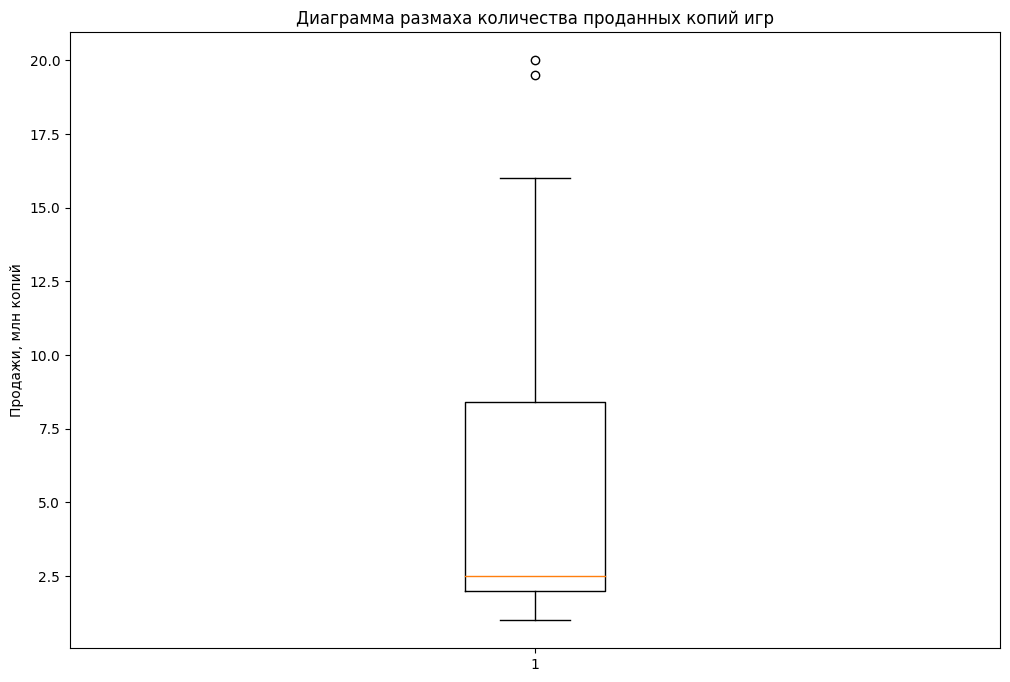

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot(x=df['Copies sold'])
plt.ylabel('Продажи, млн копий')
plt.title('Диаграмма размаха количества проданных копий игр');

Видим, что половина игр из нашего датасета были проданы в количестве от 2 до 8.4 млн копий. Игр с экстремально большим количеством продаж только две.

Строим столбчатую диаграмму для топ-10 игр по количеству проданных копий.

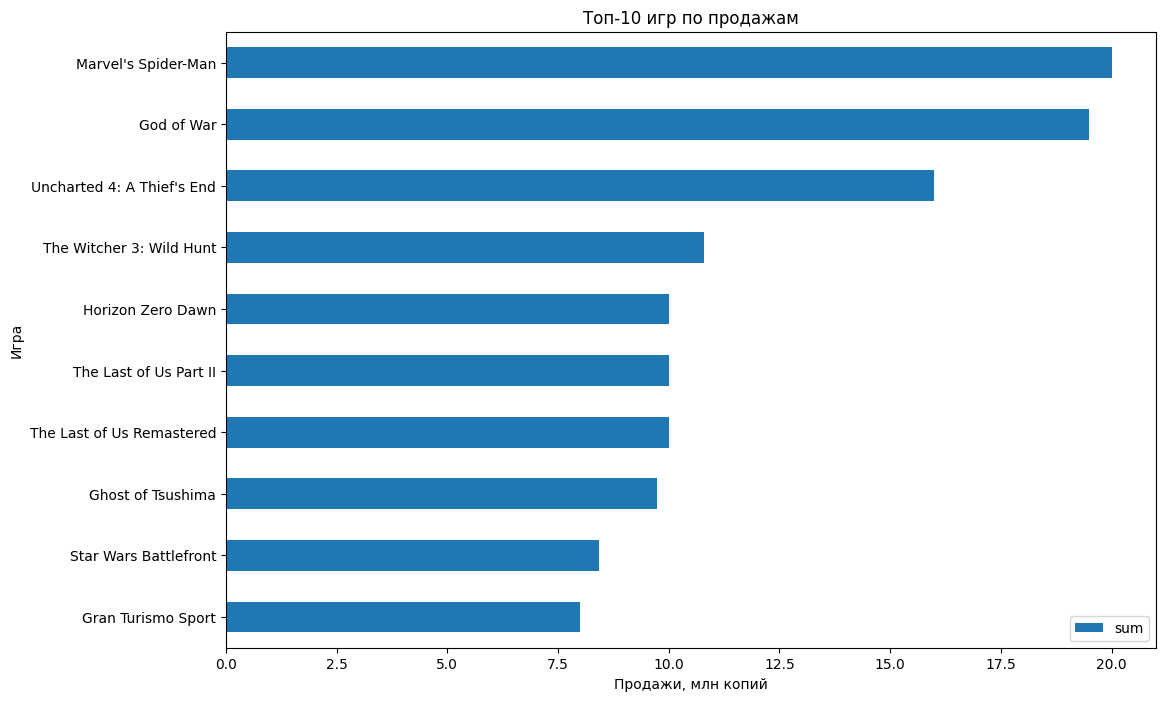

In [ ]:
game_sum = (
    df.groupby('Game')['Copies sold']
    .agg(['sum'])
    .sort_values(by='sum', ascending=False)
    .head(10)
)

game_sum = game_sum.sort_values(by='sum')

fig, ax = plt.subplots(figsize=(12, 8))
bars = game_sum.plot(kind='barh', ax=ax)
plt.title('Топ-10 игр по продажам')
plt.xlabel('Продажи, млн копий')
plt.ylabel('Игра')
plt.show();

Лучшие из лучших, как говорится. Главные хиты этого поколения консолей, повлиявшие на будущее игровой индустрии.

Смотрим, какие по жанрам игры представлены в нашем датасете.

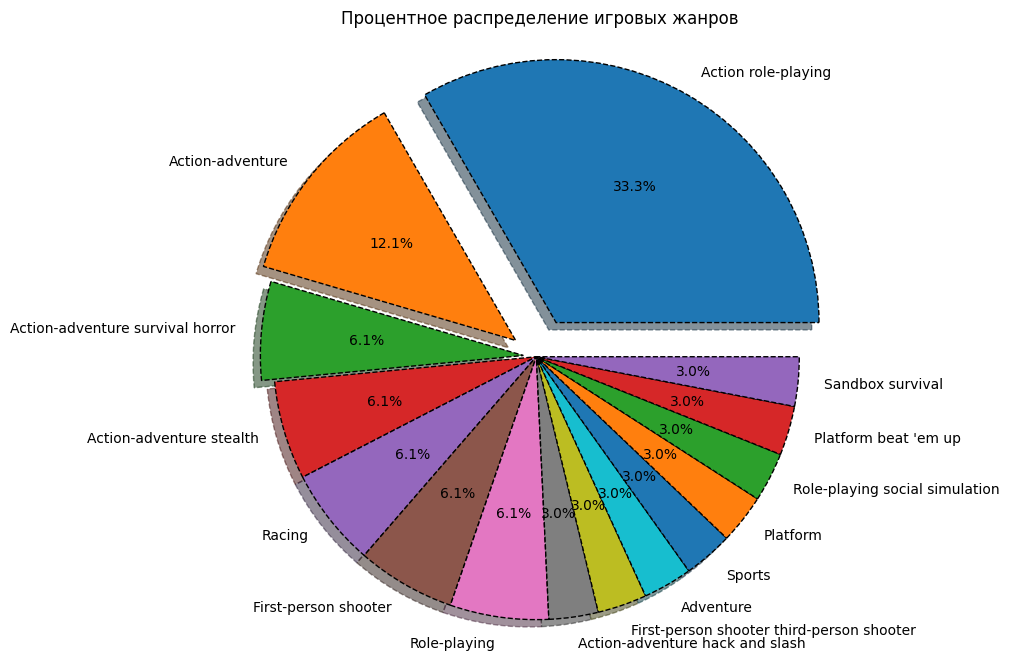

In [ ]:
counts = df['Genre'].value_counts()
explode = [0.15,0.1,0.05] + [0]*(len(counts)-3)
plt.figure(figsize = (12,8))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', shadow =True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'})
plt.axis('equal')
plt.title('Процентное распределение игровых жанров')
plt.show()

Вполне закрономерно, жанры экшен-рпг и экшен-приключение последние годы на пике своей популярности, именно в этих жанрах и создаётся больше всего проектов первой величины. После них следует целый ряд жанров, попавших в наш список бестселлеров в одинаковом количестве.

А теперь посмотрим, игры каких из этих жданров продавались лучше всего.

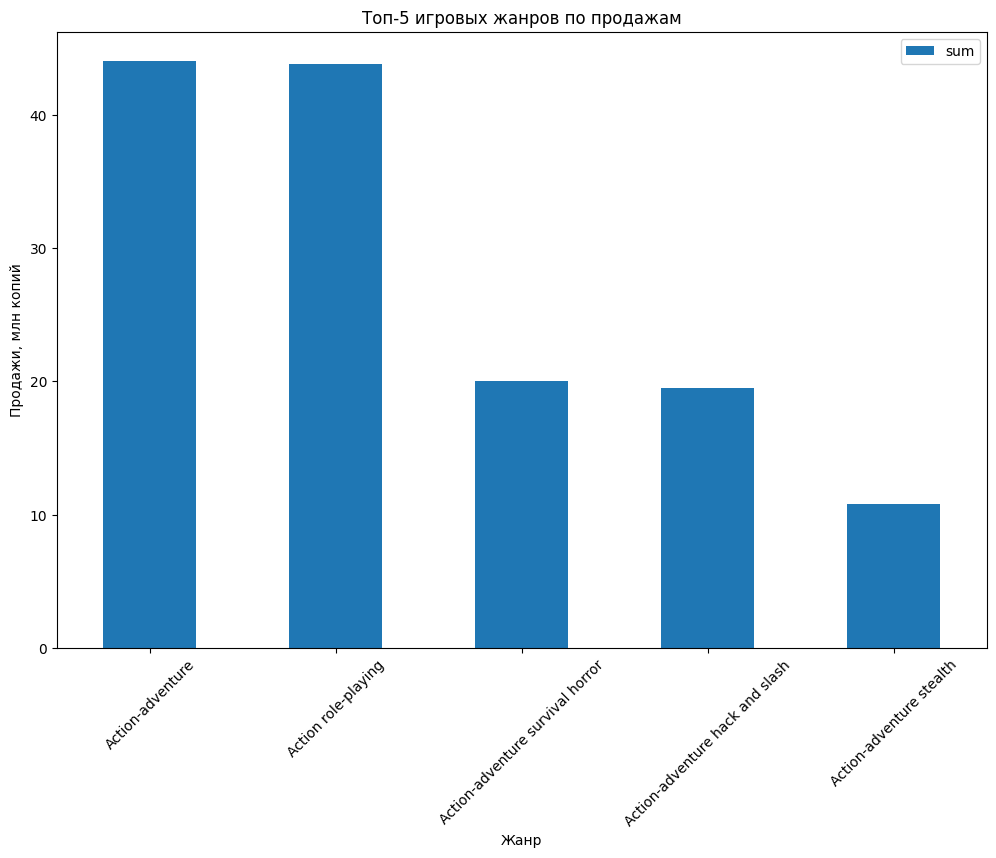

In [ ]:
genres_sum = (
    df.groupby('Genre')['Copies sold']
    .agg(['sum'])
    .sort_values(by='sum', ascending=False)
    .head()
)

fig, ax = plt.subplots(figsize=(12, 8))
genres_sum.plot(kind='bar', ax=ax)
plt.title('Топ-5 игровых жанров по продажам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation=45)
plt.show();

Топ-5 продаж сплошь оккупирован разными поджанрами экшенов. Люди хотят действия.

Смотрим теперь, а кто же создал главные шедевры поколения. Начнём с суммарных продаж.

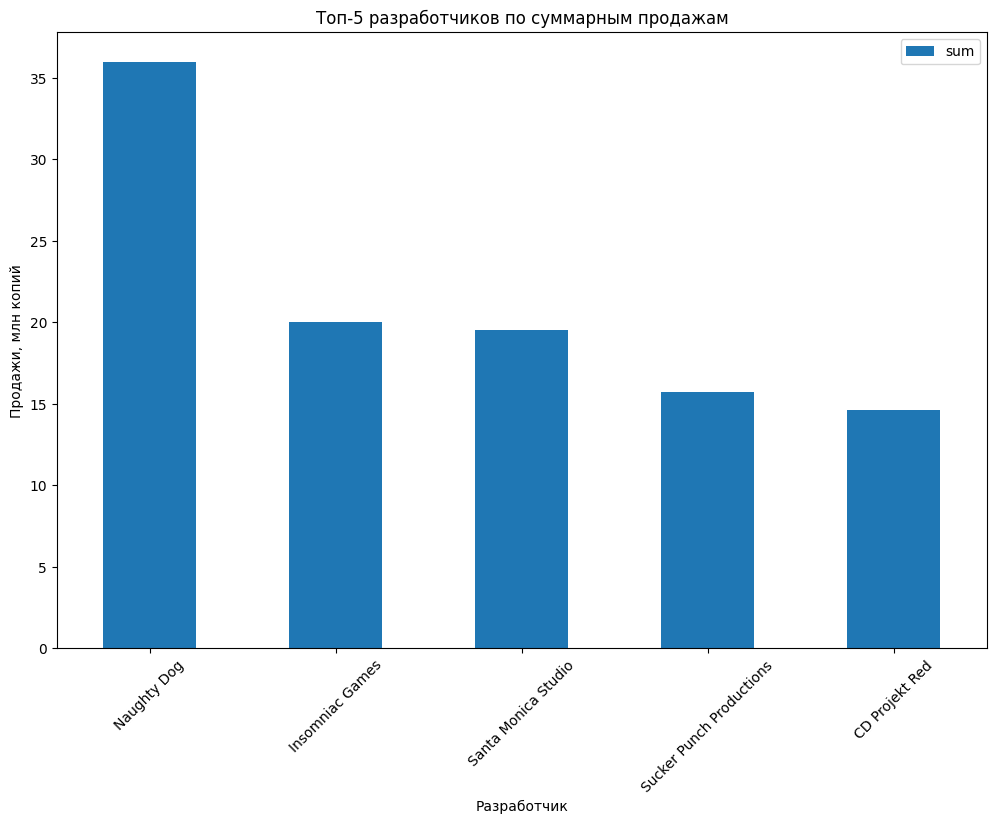

In [ ]:
developer_sum = (
    df.groupby('Developer')['Copies sold']
    .agg(['sum'])
    .sort_values(by='sum', ascending=False)
    .head()
)

fig, ax = plt.subplots(figsize=(12, 8))
developer_sum.plot(kind='bar', ax=ax)
plt.title('Топ-5 разработчиков по суммарным продажам')
plt.xlabel('Разработчик')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation=45)
plt.show();

Самыми успешными разработчиками объявляются Naughty Dog с их Unacharted 4, ремейком Last of Us для данного поколения консолей и его пролдолжением Last of Us 2.

Так же сделаем топ по медианным продажам, чтобы посмотреть, чья каждая игра продавалась в наибольшем количестве.

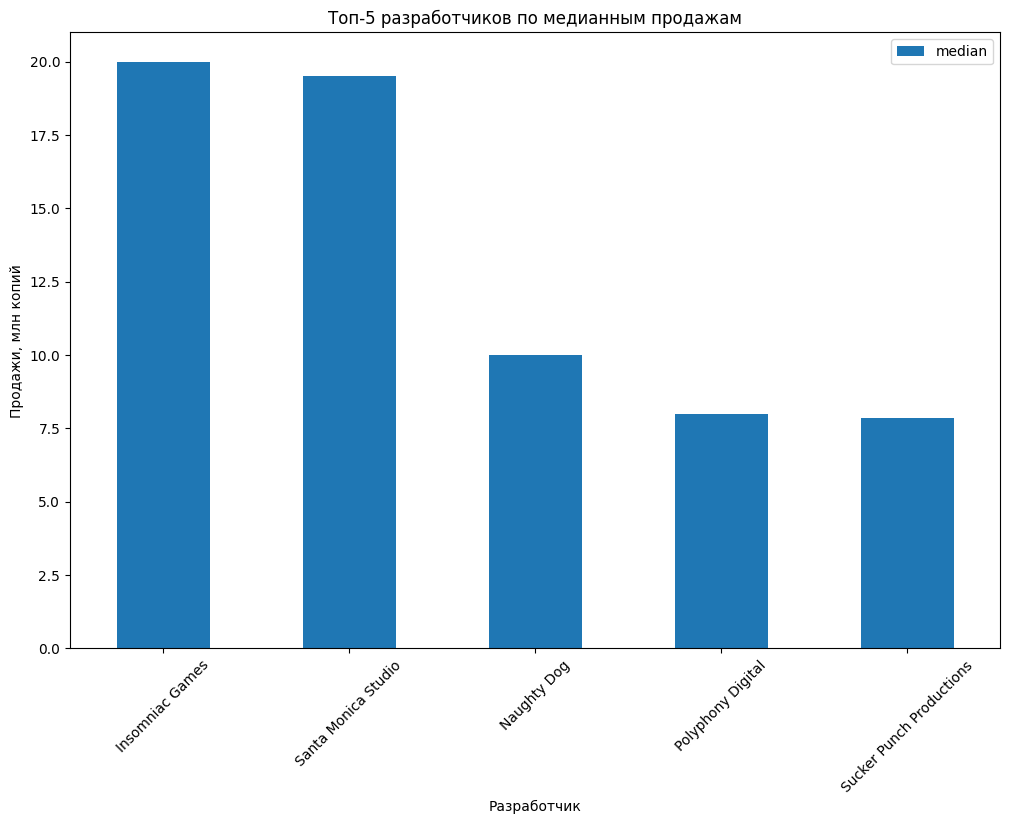

In [ ]:
developer_median = (
    df.groupby('Developer')['Copies sold']
    .agg(['median'])
    .sort_values(by='median', ascending=False)
    .head()
)

fig, ax = plt.subplots(figsize=(12, 8))
developer_median.plot(kind='bar', ax=ax)
plt.title('Топ-5 разработчиков по медианным продажам')
plt.xlabel('Разработчик')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation=45)
plt.show();

А тут уже Insomniac Games со своим хитом про Человека-Паука взяли первенство.

Теперь определяем издателя, выпустившего игры, суммарно продавшиеся в наибольшем количестве.

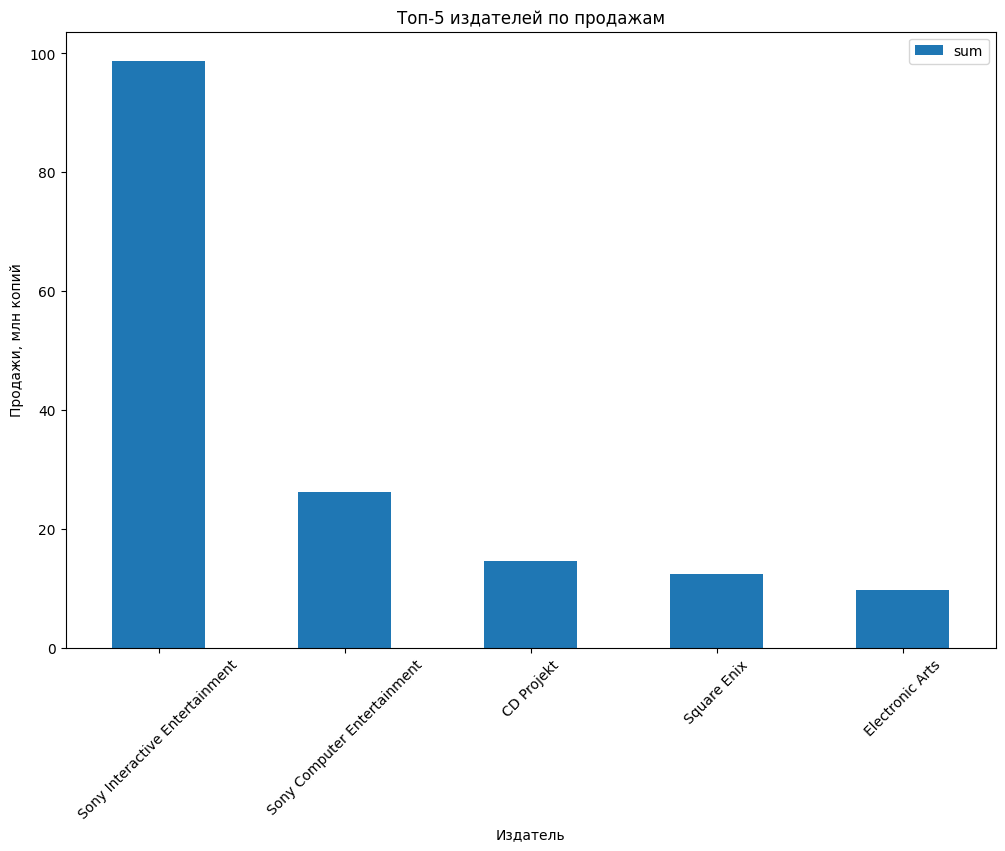

In [ ]:
publisher_sum = (
    df.groupby('Publisher')['Copies sold']
    .agg(['sum'])
    .sort_values(by='sum', ascending=False)
    .head()
)

fig, ax = plt.subplots(figsize=(12, 8))
publisher_sum.plot(kind='bar', ax=ax)
plt.title('Топ-5 издателей по продажам')
plt.xlabel('Издатель')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation=45)
plt.show();

Sony Interactive Entertaiment вне конкуренции.

Напоследок посмотрим, как по времени были раскиданы релизы рассматриваемых игр.

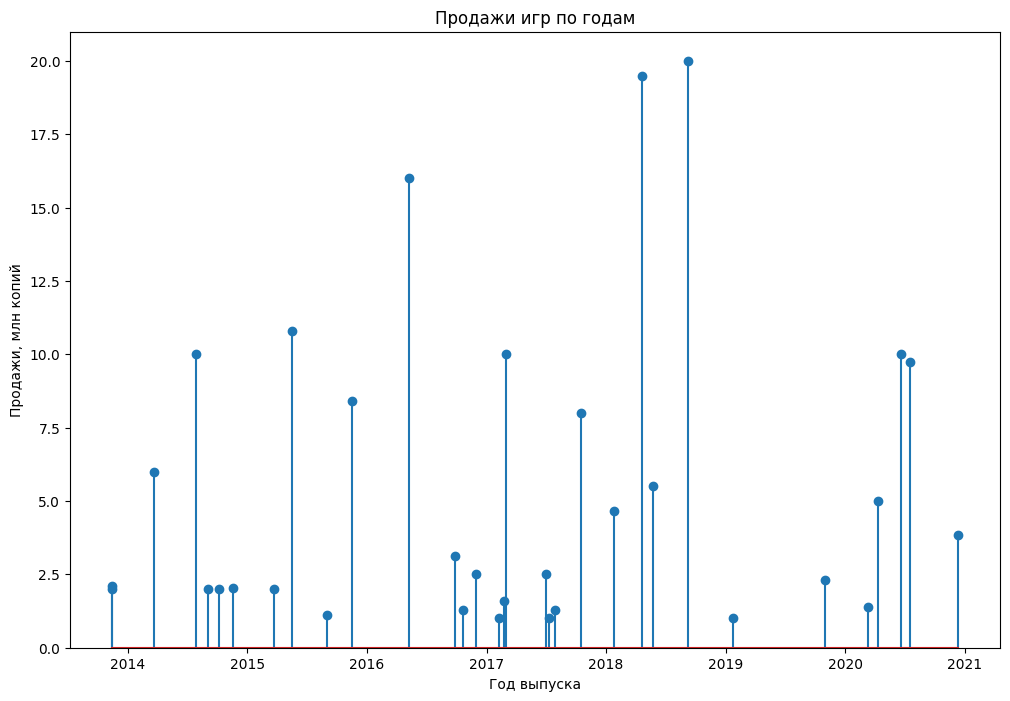

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.stem(df['Release date'], df['Copies sold'])
plt.title('Продажи игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн копий')
plt.ylim(0, 21)
plt.show()

Лучшим годом в истории PS4 можно назвать 2018-ый, потому что в этом году вышло сразу две самых продаваемых игры поколения: Marve's Spider-Man и God of War. Это соответствует общим закономерностям рынка видеоигр: зачастую главные хиты выходят в районе середины жизненного срока игровой платформы. Это связано с тем, что к тому времени инструментарий по созданию игр для текущей игровой платформы уже освоен разработчиками как следует и позволяет максимально реализовать потенциал консоли, а у издателей накоплено достаточно опыта работы с играми данного поколения.

## Выводы.


- Минимальное количество продаж игр 1 млн копий, максимальное 20 млн. Половина игр из датасета проданы в количестве от 2 до 8.4 млн копий.

- Больше всего было выпущено игр жанров экшен-рпг и экшен-приключение, они же и были проданы в наибольшем суммарном количестве.

- По сумме продаж игр первое место заняли Naughty Dog (36 млн копий), но по количеству продаж отдельних игр они третьем месте, первые Insomniac Games (20 млн копий).

- Самый успешный издатель - Sony Interactive Entertaiment. Выпущенные ими игры в сумме разошлись в количестве 98 млн. копий.

- Обе самые продаваемые игры этого поколения консоли были выпущены в 2018-ом году.